<a href="https://colab.research.google.com/github/ucfilho/ANN/blob/master/ANN_2022/Image_11/Class_011_object_detection_000_ANN_Finding_stones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Network find places where there are the stones

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import zipfile
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline

In [ ]:
!git clone https://github.com/ucfilho/Machine_Learning_DataSet
%cd Machine_Learning_DataSet

fatal: destination path 'Machine_Learning_DataSet' already exists and is not an empty directory.
/content/Machine_Learning_DataSet


In [ ]:
!gdown 1EMAqxWAIDJXqZv4qyAK-mDbx3X-uh7jp

Downloading...
From: https://drive.google.com/uc?id=1EMAqxWAIDJXqZv4qyAK-mDbx3X-uh7jp
To: /content/Machine_Learning_DataSet/find_stones_area.zip
100% 113M/113M [00:00<00:00, 370MB/s]


In [ ]:
FILE='find_stones_area.zip'

In [ ]:
archive = zipfile.ZipFile(FILE, 'r')
archive.extractall()

In [ ]:
img_name=[]
with zipfile.ZipFile(FILE, "r") as f:
    for name in f.namelist():
        img_name.append(name)

In [ ]:
#img_name

In [ ]:
stones2find = cv2.imread('20221103_143816quarter.jpg',0)

In [ ]:
h,w = stones2find.shape
print(w,h)

1860 4032


In [ ]:
stones2find.shape

(4032, 1860)

In [ ]:
hi, hf = 1000, 2800
valor = hf - hi
img=np.zeros((valor,w)).astype(np.int64)

In [ ]:
img.shape

(1800, 1860)

In [ ]:

for i in range(valor):
  for j in range(w):
    img[i,j]=stones2find[i+hi,j]


In [ ]:
stones2find = img

In [ ]:
nrow, ncol = stones2find.shape
nrow, ncol

(1800, 1860)

In [ ]:
size = 50
horiz = int(nrow/size)
vert = int(ncol/size)
segmentation = []
for i in range(horiz):
  h = i*size
  for j in range(vert):
    w = j*size
    img=np.zeros((size,size)).astype(np.int64)
    for ii in range(size):
      for jj in range(size):
        img[ii,jj] = stones2find[ii+h,jj+w]
    
    segmentation.append(img)



#plt.figure(figsize=(5,5))
#plt.imshow(img)

In [ ]:
len(segmentation)

1332

In [ ]:
horiz*vert

1332

In [ ]:
'''
plt.figure(figsize=(30, 30))
n = horiz*vert
for i in range(n): 
  ax = plt.subplot(horiz, vert, i + 1)
  plt.imshow(segmentation[i], cmap="gray")
  #plt.title(i)
  plt.axis("off")
'''

'\nplt.figure(figsize=(30, 30))\nn = horiz*vert\nfor i in range(n): \n  ax = plt.subplot(horiz, vert, i + 1)\n  plt.imshow(segmentation[i], cmap="gray")\n  #plt.title(i)\n  plt.axis("off")\n'

In [ ]:
def result2y(y,number,classes):
  k = 0
  for ni in number:
    for i in range(number[k]):
      y.append(classes[k])
    k = k +1
  return y

# note: y=[0,1,2,3] for outside, border,grain, stone ( y =[] first time)
#       number = [n1,n2,n3,..] ni reprents number of times yi appear in sequence
#       classes = [y1,y2,y3,..] yi= 0,1,2, 3 depending outside, border, grain or stone
# exemple: first row we have number = [36] and classes =[0]
#          sixth row we have number =[7,21,8] and classes=[0,1,0]

In [ ]:
'''
# 1st step
plt.figure(figsize=(30, 5))
horiz = 5
nold = 0 
n = horiz*vert

for i in range(n): 
  ax = plt.subplot(horiz, vert, i + 1)
  plt.imshow(segmentation[i+nold], cmap="gray")
  #plt.title(i)
  plt.axis("off")

nold = nold + n
'''

'\n# 1st step\nplt.figure(figsize=(30, 5))\nhoriz = 5\nnold = 0 \nn = horiz*vert\n\nfor i in range(n): \n  ax = plt.subplot(horiz, vert, i + 1)\n  plt.imshow(segmentation[i+nold], cmap="gray")\n  #plt.title(i)\n  plt.axis("off")\n\nnold = nold + n\n'

In [ ]:
# rows 1 to 5: 
y = []

for i in range(5):
  number = [37]; classes =[0]; y=result2y(y,number,classes)

print('num y',len(y))

num y 185


In [ ]:
'''
# 2nd step
plt.figure(figsize=(30, 5))
horiz = 5
# nold = 0 
n = horiz*vert

for i in range(n): 
  ax = plt.subplot(horiz, vert, i + 1)
  plt.imshow(segmentation[i+nold], cmap="gray")
  #plt.title(i)
  plt.axis("off")
  
nold = nold + n
'''

'\n# 2nd step\nplt.figure(figsize=(30, 5))\nhoriz = 5\n# nold = 0 \nn = horiz*vert\n\nfor i in range(n): \n  ax = plt.subplot(horiz, vert, i + 1)\n  plt.imshow(segmentation[i+nold], cmap="gray")\n  #plt.title(i)\n  plt.axis("off")\n  \nnold = nold + n\n'

In [ ]:
# 6th row: 
number = [7,21,9]; classes =[0,1,0]; y=result2y(y,number,classes)
# rows 7 to 10
number = [7,2,12,1,4,2,9]
classes =[0,1,2,3,2,1,0]
y=result2y(y,number,classes)

#-------------
number = [7,2,10,3,2,1,1,2,9] 
classes =[0,1,2, 3,2,3,2,1,0]
y=result2y(y,number,classes)
#-------------
number = [7,2,7,5,3,1,1,2,9] 
classes =[0,1,2,3,2,3,2,1,0]
y=result2y(y,number,classes)
#-------------
number = [7,2,8,4,5,2,9]
classes =[0,1,2,3,2,1,0]
y=result2y(y,number,classes)

print('num y',len(y))

num y 370


In [ ]:
'''
# 3nd step
plt.figure(figsize=(30, 5))
horiz = 5
# nold = 0 
n = horiz*vert

for i in range(n): 
  ax = plt.subplot(horiz, vert, i + 1)
  plt.imshow(segmentation[i+nold], cmap="gray")
  #plt.title(i)
  plt.axis("off")
  
nold = nold + n
'''

'\n# 3nd step\nplt.figure(figsize=(30, 5))\nhoriz = 5\n# nold = 0 \nn = horiz*vert\n\nfor i in range(n): \n  ax = plt.subplot(horiz, vert, i + 1)\n  plt.imshow(segmentation[i+nold], cmap="gray")\n  #plt.title(i)\n  plt.axis("off")\n  \nnold = nold + n\n'

In [ ]:
# rows 11 to 15
number = [8,1,4,5,1,7,2,9]
classes= [0,1,2,3,2,3,1,0]
y=result2y(y,number,classes)
#-----------------
number = [8,1,4,5,1,8,1,9]
classes= [0,1,2,3,2,3,1,0]
y=result2y(y,number,classes)
#-----------------
number = [8,1,2,15,2,9]
classes= [0,1,2,3 ,1,0]
y=result2y(y,number,classes)
#-----------------
number = [8,1,1,15,1,2,9]
classes= [0,1,2,3 ,2,1,0]
y=result2y(y,number,classes)
#-----------------
number = [8,1,3,7,1,4,2,2,9]
classes= [0,1,2,3,2,3,2,1,0]
y=result2y(y,number,classes)
#-----------------
print('num y',len(y))

num y 555


In [ ]:
'''
# 4th step
plt.figure(figsize=(30, 5))
horiz = 5
# nold = 0 
n = horiz*vert

for i in range(n): 
  ax = plt.subplot(horiz, vert, i + 1)
  plt.imshow(segmentation[i+nold], cmap="gray")
  #plt.title(i)
  plt.axis("off")
  
nold = nold + n
'''

'\n# 4th step\nplt.figure(figsize=(30, 5))\nhoriz = 5\n# nold = 0 \nn = horiz*vert\n\nfor i in range(n): \n  ax = plt.subplot(horiz, vert, i + 1)\n  plt.imshow(segmentation[i+nold], cmap="gray")\n  #plt.title(i)\n  plt.axis("off")\n  \nnold = nold + n\n'

In [ ]:
'''
# 5th step
plt.figure(figsize=(30, 5))
horiz = 5
# nold = 0 
n = horiz*vert

for i in range(n): 
  ax = plt.subplot(horiz, vert, i + 1)
  plt.imshow(segmentation[i+nold], cmap="gray")
  #plt.title(i)
  plt.axis("off")
  
nold = nold + n
'''

'\n# 5th step\nplt.figure(figsize=(30, 5))\nhoriz = 5\n# nold = 0 \nn = horiz*vert\n\nfor i in range(n): \n  ax = plt.subplot(horiz, vert, i + 1)\n  plt.imshow(segmentation[i+nold], cmap="gray")\n  #plt.title(i)\n  plt.axis("off")\n  \nnold = nold + n\n'

In [ ]:
'''
# 6th step
plt.figure(figsize=(30, 5))
horiz = 5
# nold = 0 
n = horiz*vert

for i in range(n): 
  ax = plt.subplot(horiz, vert, i + 1)
  plt.imshow(segmentation[i+nold], cmap="gray")
  #plt.title(i)
  plt.axis("off")
  
nold = nold + n
'''

'\n# 6th step\nplt.figure(figsize=(30, 5))\nhoriz = 5\n# nold = 0 \nn = horiz*vert\n\nfor i in range(n): \n  ax = plt.subplot(horiz, vert, i + 1)\n  plt.imshow(segmentation[i+nold], cmap="gray")\n  #plt.title(i)\n  plt.axis("off")\n  \nnold = nold + n\n'

In [ ]:
'''
# 7th step
plt.figure(figsize=(30, 5))
horiz = 5 +1 # the last missing row (add one to get it)
# nold = 0 
n = horiz*vert

for i in range(n): 
  ax = plt.subplot(horiz, vert, i + 1)
  plt.imshow(segmentation[i+nold], cmap="gray")
  #plt.title(i)
  plt.axis("off")
  
nold = nold + n
'''

'\n# 7th step\nplt.figure(figsize=(30, 5))\nhoriz = 5 +1 # the last missing row (add one to get it)\n# nold = 0 \nn = horiz*vert\n\nfor i in range(n): \n  ax = plt.subplot(horiz, vert, i + 1)\n  plt.imshow(segmentation[i+nold], cmap="gray")\n  #plt.title(i)\n  plt.axis("off")\n  \nnold = nold + n\n'

In [ ]:
# Last six rows of image
for i in range(6):
  number = [37]; classes =[0]; y=result2y(y,number,classes)
print('num y',len(y))

num y 777


In [ ]:
len(y)/37

21.0

In [ ]:

names = []
for yi in y:
  if(yi==0):
    names.append('outside')
  elif(yi==1):
    names.append('frame')
  elif(yi==2):
    names.append('grain')
  else:
    names.append('stone')

In [ ]:
k = 0
cont_out = 0
fator = 9
Ind =[]
for ni in names:
  if (ni=='outside'):
    cont_out += 1
    if(cont_out % fator == 0):
      Ind.append(k)
  if(ni != 'outside'):
    Ind.append(k)

  k += 1

In [ ]:
y_filter =[]
names_filter =[]
for i in Ind:
  y_filter.append(y[i])
  names_filter.append(names[i])

In [ ]:
df = pd.DataFrame({'name':names_filter,'class':y_filter})
y_dummy_filter = pd.get_dummies(df['class'])
y_dummy_filter

,0,1,2,3
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
263,1,0,0,0
264,1,0,0,0
265,1,0,0,0
266,1,0,0,0


In [ ]:
types = ['outside', 'frame', 'grain', 'stone']
for i in range(4): 
  n= df[(df["class"] == i)].shape[0]
  print(types[i],n)

outside 63
frame 51
grain 73
stone 81


In [ ]:
n = len(y_filter)
n

268

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50
model = ResNet50(weights='imagenet')

In [ ]:

fake = []
for i in Ind:
  fake.append(segmentation[i])


In [ ]:
n =len(y)
data = np.empty((n, 224, 224,3))

In [ ]:
def expand_greyscale_image_channels(grey_pil_image):
    grey_image_arr = np.array(grey_pil_image)
    grey_image_arr = np.expand_dims(grey_image_arr, -1)
    grey_image_arr_3_channel = grey_image_arr.repeat(3, axis=-1)
    return grey_image_arr_3_channel

X = expand_greyscale_image_channels(fake)

In [ ]:
from keras.applications.mobilenet_v2 import preprocess_input
from skimage.transform import resize
i = 0
for im in X:
    im = preprocess_input(im)
    im = resize(im, output_shape=(224, 224))
    data[i] = im
    i += 1

In [ ]:
from keras.applications.mobilenet_v2 import decode_predictions

predictions = model.predict(data)
k = 0
for decoded_prediction in decode_predictions(predictions, top=1):
  
  for name, desc, score in decoded_prediction:
      if(k % 50 ==0):
        print('- {} ({:.2f}%) {}'.format(desc, 100 * score,names[k]))
  k = k +1

25/25 [==============================] - 6s 99ms/step
- nematode (15.04%) outside
- nematode (14.28%) outside
- nematode (14.83%) outside
- nematode (14.03%) outside
- nematode (14.99%) frame
- nematode (13.06%) outside
- nematode (14.91%) outside
- nematode (14.91%) stone
- nematode (14.91%) outside
- nematode (14.91%) outside
- nematode (14.91%) stone
- nematode (14.91%) outside
- nematode (14.91%) outside
- nematode (14.91%) outside
- nematode (14.91%) outside
- nematode (14.91%) outside


In [ ]:
DATASET_SIZE = len(y_filter)
Ind = range(DATASET_SIZE)
Ind_train, Ind_test= train_test_split(Ind,test_size=0.10,stratify=y_filter, shuffle=True, random_state=3)

In [ ]:
X_train=data[Ind_train,:]
X_test = data[Ind_test,:]
y_train=y_dummy_filter.iloc[Ind_train,:]
y_test = y_dummy_filter.iloc[Ind_test,:]

In [ ]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 176

# Freeze all the layers before the `fine_tune_at` layer
# check https://www.tensorflow.org/tutorials/images/transfer_learning
for layer in model.layers[:fine_tune_at]:
  layer.trainable = False

Number of layers in the base model:  177


In [ ]:
#from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense #, Activation, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization

In [ ]:
D =len(types)
model_output = Dense(D, activation= 'softmax') #'relu')
model_output = model_output(model.layers[-2].output)
model_input = model.input
model_new = Model(inputs=model_input, outputs=model_output)

In [ ]:
model_new.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
r = model_new.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_test, y_test),
    epochs=200,
    verbose=2
)

Epoch 1/200
8/8 - 6s - loss: 1.4925 - accuracy: 0.3278 - val_loss: 1.3557 - val_accuracy: 0.2963 - 6s/epoch - 743ms/step
Epoch 2/200
8/8 - 1s - loss: 1.3939 - accuracy: 0.2697 - val_loss: 1.3226 - val_accuracy: 0.3704 - 810ms/epoch - 101ms/step
Epoch 3/200
8/8 - 1s - loss: 1.3356 - accuracy: 0.3610 - val_loss: 1.3151 - val_accuracy: 0.2963 - 810ms/epoch - 101ms/step
Epoch 4/200
8/8 - 1s - loss: 1.3387 - accuracy: 0.3154 - val_loss: 1.2870 - val_accuracy: 0.4444 - 874ms/epoch - 109ms/step
Epoch 5/200
8/8 - 1s - loss: 1.3273 - accuracy: 0.3817 - val_loss: 1.2720 - val_accuracy: 0.4815 - 803ms/epoch - 100ms/step
Epoch 6/200
8/8 - 1s - loss: 1.3103 - accuracy: 0.4191 - val_loss: 1.2660 - val_accuracy: 0.4444 - 801ms/epoch - 100ms/step
Epoch 7/200
8/8 - 1s - loss: 1.3128 - accuracy: 0.4481 - val_loss: 1.2495 - val_accuracy: 0.4444 - 810ms/epoch - 101ms/step
Epoch 8/200
8/8 - 1s - loss: 1.2990 - accuracy: 0.3568 - val_loss: 1.2429 - val_accuracy: 0.4444 - 808ms/epoch - 101ms/step
Epoch 9/200

In [ ]:
def retorna(y):
  resp = []
  for yi in y:
    vmax =max(yi)
    for idx, x in enumerate(yi):
      if(x == vmax):
        resp.append(idx)
  return resp

In [ ]:
test_loss, test_acc = model_new.evaluate(X_test,  y_test, verbose=2)

1/1 - 0s - loss: 1.0763 - accuracy: 0.6296 - 96ms/epoch - 96ms/step


In [ ]:
predict=model_new.predict(X_test)

1/1 [==============================] - 1s 817ms/step


In [ ]:
y_calc = retorna(predict)
y_test = retorna(np.array(y_test))

In [ ]:
confusion_matrix(y_test, y_calc)

array([[5, 0, 0, 1],
       [1, 1, 3, 0],
       [0, 1, 7, 0],
       [2, 0, 2, 4]])

In [ ]:
# Classification Report
print('\n\n', classification_report(y_test, y_calc, target_names=types))



               precision    recall  f1-score   support

     outside       0.62      0.83      0.71         6
       frame       0.50      0.20      0.29         5
       grain       0.58      0.88      0.70         8
       stone       0.80      0.50      0.62         8

    accuracy                           0.63        27
   macro avg       0.63      0.60      0.58        27
weighted avg       0.64      0.63      0.60        27



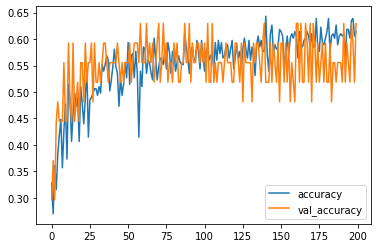

In [ ]:
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()

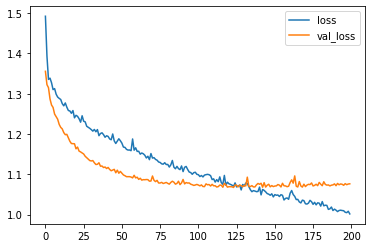

In [ ]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()